In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 期待収益率、リスク
mu = 0.05
sigma = 0.1

# チャート表示のパラメタ
year = 10
ganpon = 100

# 連続福利収益率の平均標準偏差に変換
s = np.sqrt(np.log(1+(sigma/(1+mu))**2))
r = np.log(1+mu)-(s**2)/2
# ラッパデータ作成
rappa = pd.DataFrame(np.arange(year+1),columns=['year'])
rappa['mean'] = rappa['year']*r
rappa['sd'] = np.sqrt(rappa['year'])*s
rappa['m3'] = ganpon*np.exp(rappa['mean']-3*rappa['sd'])
rappa['m2'] = ganpon*np.exp(rappa['mean']-2*rappa['sd'])
rappa['m1'] = ganpon*np.exp(rappa['mean']-1*rappa['sd'])
rappa['c'] = ganpon*np.exp(rappa['mean']-0*rappa['sd'])
rappa['p1'] = ganpon*np.exp(rappa['mean']+1*rappa['sd'])
rappa['p2'] = ganpon*np.exp(rappa['mean']+2*rappa['sd'])
rappa['p3'] = ganpon*np.exp(rappa['mean']+3*rappa['sd'])

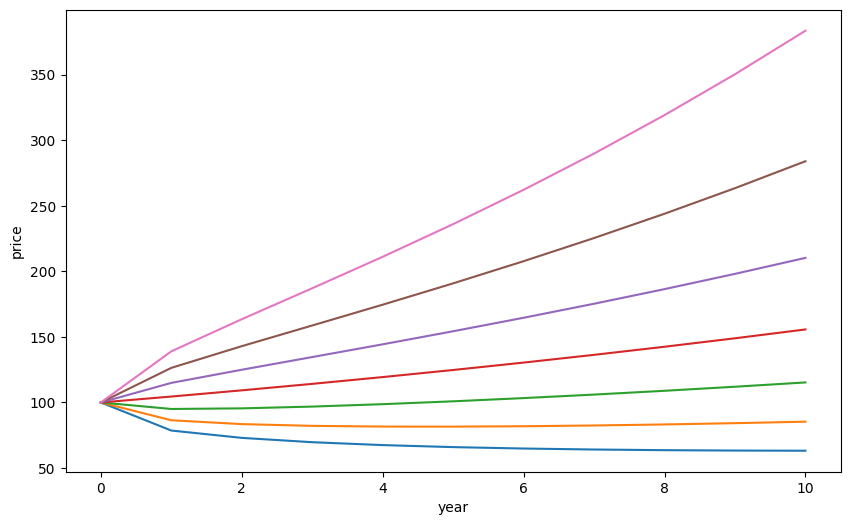

In [4]:
# チャートを表示
rlist = ['m3','m2','m1','c','p1','p2','p3']

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, xlabel='year', ylabel='price')

ax.plot(rappa[rlist])

fig.savefig('rappa.png')

In [11]:
# シミュレーション
sim_num = 100000
ranmat = np.random.normal(r,s,(year,sim_num))
expmat = np.exp(ranmat)
primat = np.cumprod(expmat,axis=0)*ganpon

In [12]:
last_price = primat[year-1,:]

In [13]:
print(np.median(last_price))

155.85899457692327


In [14]:
print(ganpon*np.power((1+mu),year))

162.8894626777442


In [9]:
print(expmat.mean())

1.0500229787271969


In [10]:
print(expmat.std())

0.10002239665761176


In [9]:
np.savetxt('expmat.csv', expmat, delimiter=',')

In [5]:
np.savetxt('primat.csv', primat, delimiter=',')

In [9]:
import numpy as np

# データの準備
data = np.random.rand(100)  # 0から1の範囲のランダムな値を100個生成

# 50パーセンタイル（中央値）
median = np.percentile(data, 50)
print(f"50パーセンタイル（中央値）の値は {median} です。")

# 90パーセンタイル
percentile_90 = np.percentile(data, 90)
print(f"90パーセンタイルの値は {percentile_90} です。")

# 25パーセンタイル
percentile_25 = np.percentile(data, 25)
print(f"25パーセンタイルの値は {percentile_25} です。")


50パーセンタイル（中央値）の値は 0.6018983953787405 です。
90パーセンタイルの値は 0.9455385131164834 です。
25パーセンタイルの値は 0.2903541929520572 です。


In [15]:
percentile_03 = np.percentile(last_price, 2.275)
percentile_16 = np.percentile(last_price, 15.865)
percentile_50 = np.percentile(last_price, 50)
percentile_84 = np.percentile(last_price, 100-15.865)
percentile_97 = np.percentile(last_price, 100-2.275)
print(percentile_03)
print(percentile_16)
print(percentile_50)
print(percentile_84)
print(percentile_97)

85.4629943593707
115.25999202464668
155.85899457692327
210.57910088442634
284.95623985307407


In [34]:
rappa.iloc[-1,:]

year      30.000000
mean       1.328264
sd         0.520463
m3        79.205335
m2       133.287322
m1       224.296887
c        377.448453
p1       635.173036
p2      1068.873862
p3      1798.708807
Name: 30, dtype: float64